In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
titanic = pd.read_csv('train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Goncalves, Mr. Manuel Estanslas",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,16))
sns.set()

/Users/ajain11/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1152x1152 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a17d2b0>,
      dtype=object)

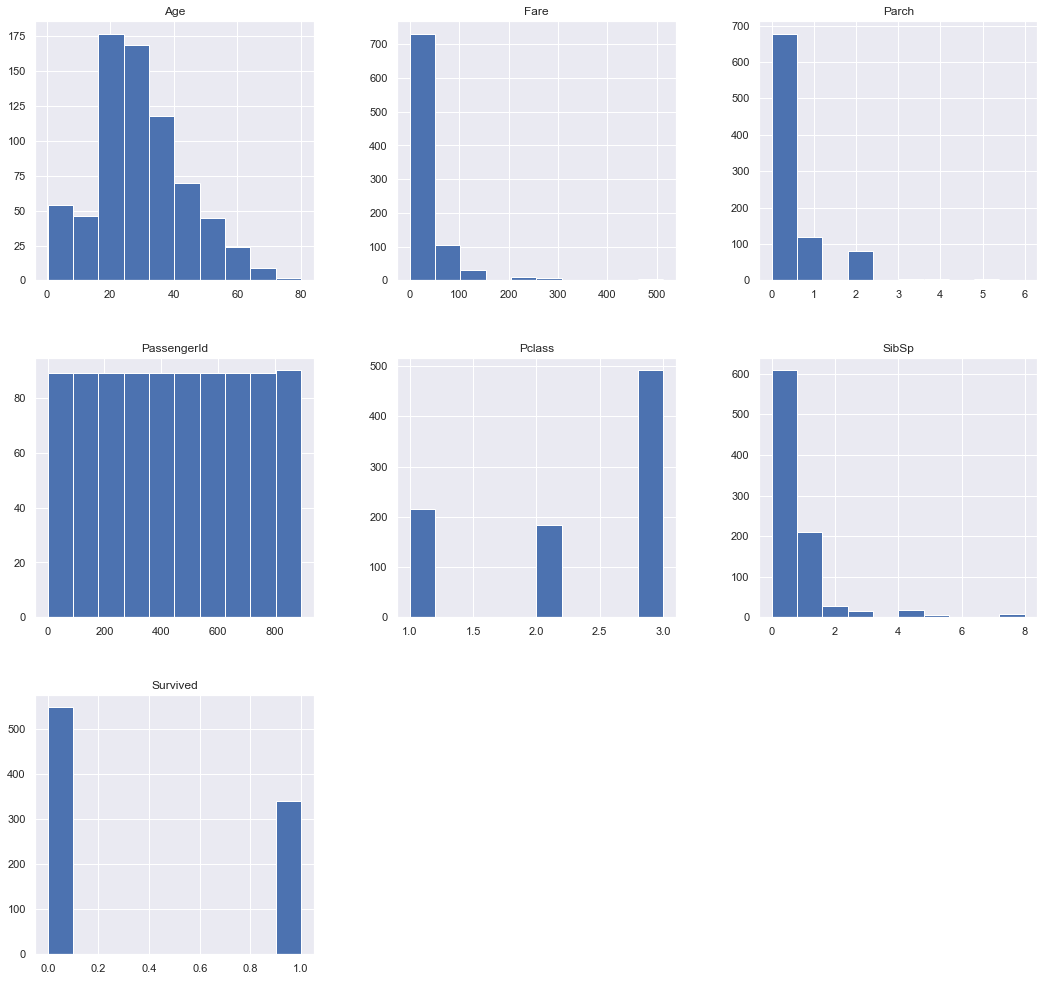

In [9]:
titanic.hist(figsize=(16,16))

In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
len(titanic.PassengerId.unique())

891

#### Since all values of passenger id are unique, it is not useful for prediction.

In [12]:
titanic.drop('PassengerId', axis = 1, inplace = True)

In [13]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Analyzing ticket column

In [14]:
len(titanic.Ticket.unique())

681

In [15]:
ticket_counts_df = titanic.Ticket.value_counts().to_frame()
ticket_counts_df.head()

,Ticket
CA. 2343,7
1601,7
347082,7
CA 2144,6
3101295,6


In [16]:
duplicate_tickets = ticket_counts_df[ticket_counts_df['Ticket'] > 1].index.to_list()

In [17]:
friends_family_df = titanic[titanic['Ticket'].isin(duplicate_tickets)].sort_values(by='Ticket')
friends_family_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S
504,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S
262,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S


#### Figure out whether people with the same ticket have the same tendency to survive.

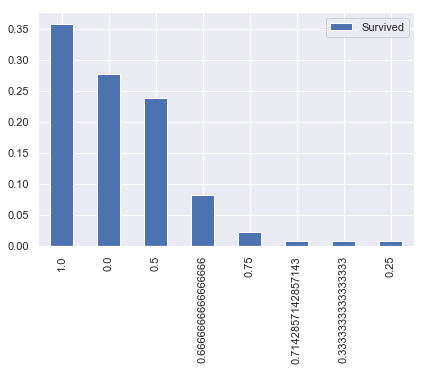

In [18]:
survival_same_ticket = (friends_family_df.groupby('Ticket')\
                        .Survived.sum()/friends_family_df.groupby('Ticket').Survived.count()).to_frame()
survival_same_ticket_dist = survival_same_ticket.Survived.value_counts().to_frame()
survival_same_ticket_dist['Survived'] = survival_same_ticket_dist['Survived']/survival_same_ticket_dist.Survived.sum()
survival_same_ticket_dist.plot(kind='bar')

#### In 35% of the duplicate ticket cases, all people in the same group survived. In 27% of the duplicate ticket cases, all people in the same group died. In the remaining 38% of the duplicate ticket cases, people in the same group had irregular survival rate.

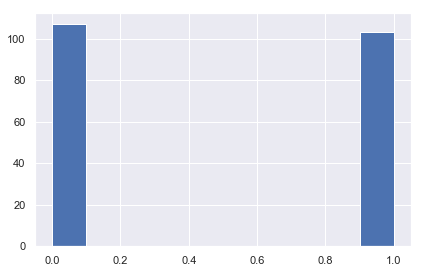

In [19]:
titanic[titanic.duplicated(subset='Ticket')].Survived.hist()

#### There is almost an even distribution between survived and non-survived people when they shared a ticket with somebody else on the ship. Hence, the ticket does not explain the survival rate. Dropping the column for now.

In [20]:
titanic.drop('Ticket', axis=1, inplace=True)

In [21]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


#### Analyzing Sex column

In [22]:
titanic.Sex.unique()

array(['male', 'female'], dtype=object)

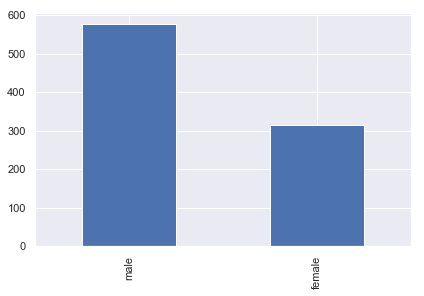

In [23]:
titanic.Sex.value_counts().plot(kind='bar')

In [24]:
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [25]:
def grouped_survival_bar(grouped_by_field_name):
    titanic.groupby(grouped_by_field_name).apply(lambda x: round(((x['Survived'].sum()/x['Survived'].count())*100), 2)).plot(kind='bar')

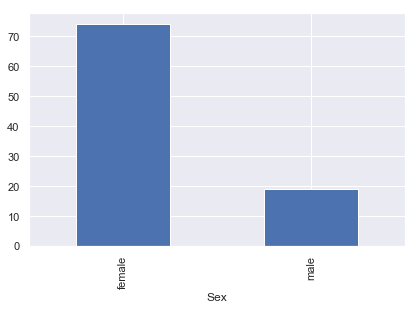

In [26]:
grouped_survival_bar('Sex')

#### >70% of the females survived compared to only about 20% of males although the number of males were much more in comparison to females. So, looks like Sex is an important factor for predicting Survival.

#### Using LabelEncoder to encode Sex since there are only 2 possible values.

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S


#### Embarkation port analysis

In [28]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
titanic.Embarked.isnull().sum()

2

In [30]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",0,38.0,0,0,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,80.0,B28,NaN


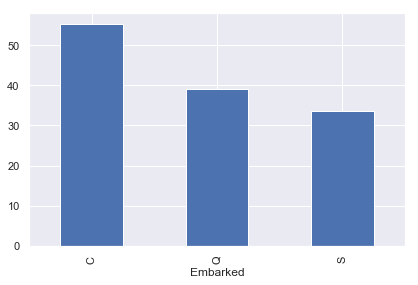

In [31]:
grouped_survival_bar('Embarked')

#### > 50% of people who embarked from port C survived compared to < 40% in case of Q and S. This also looks like a factor in predicting survival likelihood. A person embarking from port C has higher likelihood to survive. Since, the 2 cases in which the embarkation port is missing have survived, let us substitute the missing value with port C.

In [32]:
titanic.loc[titanic.Embarked.isnull(), 'Embarked'] = 'C'
titanic.Embarked.isnull().sum()

0

#### One hot encode the categorical embarkation port

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_port = ohe.fit_transform(titanic[['Embarked']]).toarray()
print(encoded_port)
print(ohe.get_feature_names())

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
['x0_C' 'x0_Q' 'x0_S']


In [34]:
titanic.loc[:, 'Embarked_C'] = encoded_port[:, 0]
titanic.loc[:, 'Embarked_Q'] = encoded_port[:, 1]
titanic.loc[:, 'Embarked_S'] = encoded_port[:, 2]
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,0.0,0.0,1.0


In [35]:
titanic.drop('Embarked', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0.0,0.0,1.0


In [36]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

#### Passenger class analysis

In [37]:
titanic.Pclass.isnull().sum()

0

In [38]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

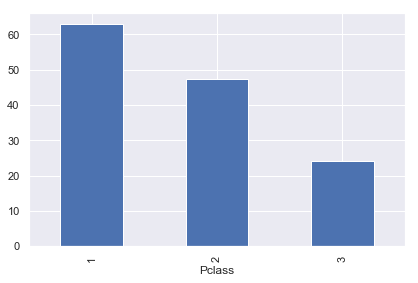

In [39]:
grouped_survival_bar('Pclass')

#### Looks like a clear trend that survival rate decreases as the passenger class becomes worse. Higher number of passenger class reflects a lower socio economic status. Thus, we will keep the PClass as is to consider for a feature.

In [40]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

#### Cabin analysis

In [41]:
titanic.Cabin.isnull().sum()/titanic.shape[0]

0.7710437710437711

In [42]:
titanic.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
D              3
              ..
C62 C64        1
B38            1
D45            1
B79            1
A36            1
Name: Cabin, Length: 147, dtype: int64

In [43]:
titanic.Cabin.nunique()

147

In [44]:
titanic.Cabin.count()

204

In [45]:
titanic[titanic.Cabin == 'C23 C25 C27']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
27,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0
88,1,1,"Fortune, Miss. Mabel Helen",0,23.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0
341,1,1,"Fortune, Miss. Alice Elizabeth",0,24.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0
438,0,1,"Fortune, Mr. Mark",1,64.0,1,4,263.0,C23 C25 C27,0.0,0.0,1.0


In [46]:
titanic[titanic.Cabin == 'B82 B84']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
789,0,1,"Guggenheim, Mr. Benjamin",1,46.0,0,0,79.2,B82 B84,1.0,0.0,0.0


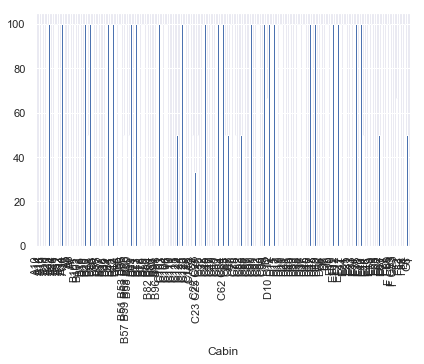

In [47]:
grouped_survival_bar('Cabin')

In [48]:
titanic.loc[:, 'Cabin_Category'] = titanic.Cabin.str.extract(r'(?P<letter>[A-Z]).').letter
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Cabin_Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0.0,0.0,1.0,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1.0,0.0,0.0,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0.0,0.0,1.0,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0.0,0.0,1.0,C
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0.0,0.0,1.0,NaN


In [49]:
titanic[titanic.Cabin == 'C23 C25 C27']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Cabin_Category
27,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0,C
88,1,1,"Fortune, Miss. Mabel Helen",0,23.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0,C
341,1,1,"Fortune, Miss. Alice Elizabeth",0,24.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0,C
438,0,1,"Fortune, Mr. Mark",1,64.0,1,4,263.0,C23 C25 C27,0.0,0.0,1.0,C


#### Assign special cabin category for missing values

In [50]:
titanic.loc[titanic.Cabin.isnull(), 'Cabin_Category'] = 'Z'

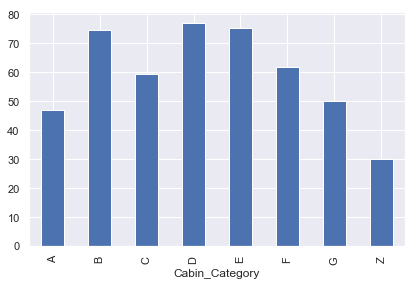

In [51]:
grouped_survival_bar('Cabin_Category')

#### Looks like Cabin Category also has variation in the percentage survival rate. Let's consider this as one of the features and get rid of the raw cabin column.

In [52]:
titanic.drop('Cabin', axis=1, inplace=True)

In [53]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,Z
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,Z
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,C
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,Z


In [54]:
titanic.loc[titanic['Cabin_Category'].isnull(), 'Cabin_Category'] = 'Z'

#### One hot encode the cabin category

In [55]:

ohe_cc = OneHotEncoder()
encoded_cc = ohe_cc.fit_transform(titanic[['Cabin_Category']]).toarray()
print(encoded_cc)
print(ohe_cc.get_feature_names())

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
['x0_A' 'x0_B' 'x0_C' 'x0_D' 'x0_E' 'x0_F' 'x0_G' 'x0_Z']


In [56]:
encoded_df = pd.DataFrame(data=encoded_cc, columns = ['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing'])
encoded_df.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
titanic = titanic.join(encoded_df)

In [58]:
titanic.drop('Cabin_Category', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing'],
      dtype='object')

#### Fare analysis

In [60]:
titanic.Fare.isnull().sum()

0

#### Since Passenger class was reflective of the socio economic status, a higher passenger class (in rank) should indicate a higher fare. Analysing their relationship below.

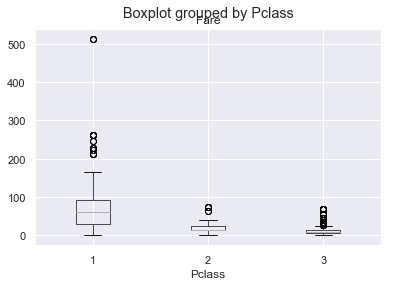

In [61]:
titanic.boxplot(column='Fare', by='Pclass')

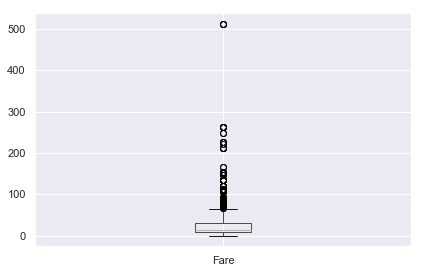

In [62]:
titanic.boxplot(column='Fare')

In [63]:
titanic[['Fare', 'Pclass']].corr()

,Fare,Pclass
Fare,1.0000,-0.5495
Pclass,-0.5495,1.0000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


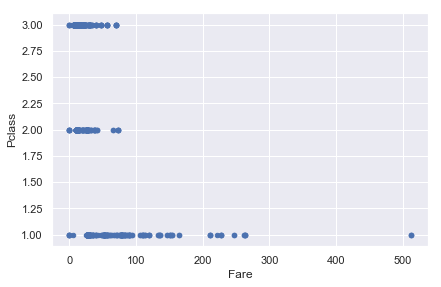

In [64]:
titanic.plot.scatter('Fare', 'Pclass')

#### Based on the above, it looks like higher fares are only present for the higher Passenger Class. But the majority of the fares lie in the lower range (probably < 100 ) and there is an almost equal distribution of Passenger class for that fare category. We will try and confirm these assumptions below.

In [65]:
titanic[titanic['Fare'] < 100].shape

(838, 19)

In [66]:
lower_fare = titanic[titanic['Fare'] < 100]

In [67]:
lower_fare.Pclass.value_counts()

3    491
2    184
1    163
Name: Pclass, dtype: int64

In [68]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

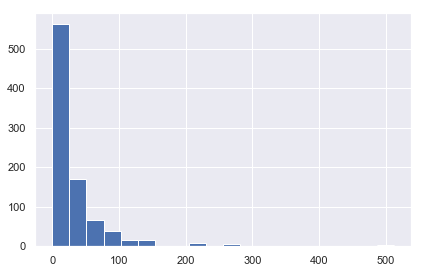

In [69]:
titanic.Fare.hist(bins=20)

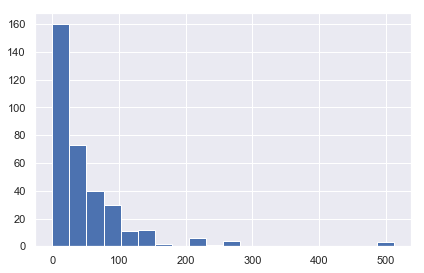

In [70]:
titanic[titanic['Survived'] == 1].Fare.hist(bins=20)

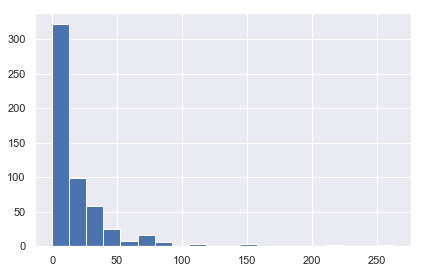

In [71]:
titanic[titanic['Survived'] == 0].Fare.hist(bins=20)

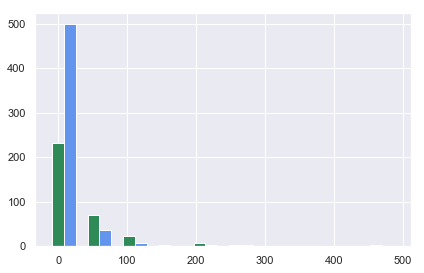

In [72]:
def side_by_side_hist(column_name):

    fig, ax = plt.subplots()

    a_heights, a_bins = np.histogram(titanic[titanic['Survived'] == 1][column_name])
    b_heights, b_bins = np.histogram(titanic[titanic['Survived'] == 0][column_name], bins=a_bins)

    width = (a_bins[1] - a_bins[0])/3

    ax.bar(a_bins[:-1], a_heights, width=width, facecolor='seagreen')
    ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='cornflowerblue')
    
side_by_side_hist('Fare')

#### Based on the above looks like, the survival rate increases as the fare increases, further indicating that people who paid more were most likely to survive. Thus, the rich were preferred. Fare would thus be a promising feature to keep.

####  Checking whether the outlier also agrees with the above hypothesis.

In [73]:
titanic[titanic['Fare'] > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
258,1,1,"Ward, Miss. Anna",0,35.0,0,0,512.3292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,512.3292,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
737,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,512.3292,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
titanic[titanic['Fare'] > 200].shape

(20, 19)

In [75]:
titanic[titanic['Fare'] > 200].Survived.value_counts()

1    14
0     6
Name: Survived, dtype: int64

In [76]:
titanic[(titanic['Fare'] > 200) & (titanic['Survived'] == 0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
27,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,263.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
118,0,1,"Baxter, Mr. Quigg Edmond",1,24.0,0,1,247.5208,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0,1,"Widener, Mr. Harry Elkins",1,27.0,0,2,211.5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
438,0,1,"Fortune, Mr. Mark",1,64.0,1,4,263.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
527,0,1,"Farthing, Mr. John",1,NaN,0,0,221.7792,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
557,0,1,"Robbins, Mr. Victor",1,NaN,0,0,227.5250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing'],
      dtype='object')

#### Analysing Siblings and Spouses (SibSp)

In [78]:
titanic['SibSp'].isnull().sum()

0

In [79]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

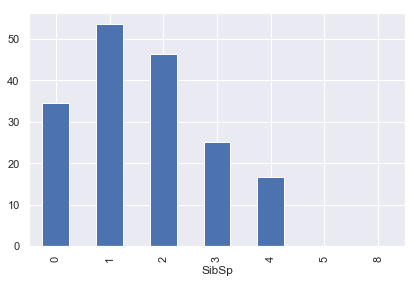

In [80]:
grouped_survival_bar('SibSp')

#### Based on the above, since there are different survival rates for different number of SibSp, it looks like it does play a role in determining the survival. The survival is higher for people with 1 or 2 siblings/spouses and decreases otherwise.

#### Analyzing parents and children (Parch)

In [81]:
titanic['Parch'].isnull().sum()

0

In [82]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

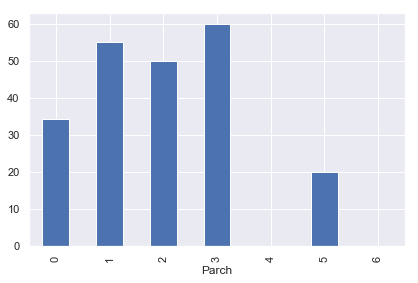

In [83]:
grouped_survival_bar('Parch')

#### Based on the above again, it seems survival rate varies with number of parents/children. People with parents/children were preferred. 

#### Age Analysis

In [84]:
titanic['Age'].isnull().sum()

177

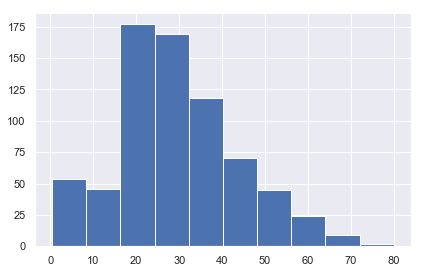

In [85]:
titanic['Age'].hist()

In [86]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

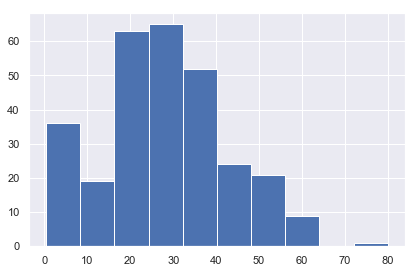

In [87]:
titanic[titanic['Survived'] == 1]['Age'].hist()

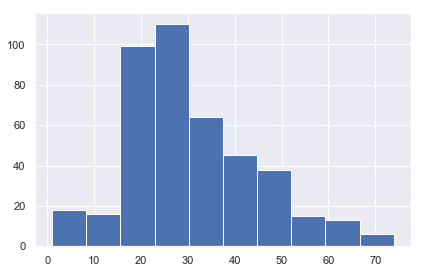

In [88]:
titanic[titanic['Survived'] == 0]['Age'].hist()

#### Based on the above 2 histograms, it looks like children (age < 15) have a better survival rate than mortality rate as opposed to people in higher ages where the mortality rate is much higher than the survival rate. Based on this initial analysis, age seems to be an important feature for predicting survival. We should try and impute the lots of missing values for age.

#### Trying to impute Age using characteristics of other columns

#### Gender distribution for missing ages

In [89]:
titanic[titanic['Age'].isnull()]['Sex'].value_counts()

1    124
0     53
Name: Sex, dtype: int64

In [90]:
titanic[titanic['Sex'] == 1]['Age'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [91]:
titanic[titanic['Sex'] == 0]['Age'].describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

#### If we are planning to impute with the median Age, this sex information is helping it narrow it down to probably more accurate age since the median values for different sexes is different as evident above.

#### Using title in the names if possible to determine children vs adults vs elderly

In [99]:
titles = titanic['Name'].str.extract(r'(?P<letter>\w+)\.')
titles.head()

,letter
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [100]:
titles.letter.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Lady          1
Jonkheer      1
Sir           1
Capt          1
Countess      1
Don           1
Ms            1
Name: letter, dtype: int64

In [104]:
titanic[titles.letter == 'Master'].Age.describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

In [105]:
titanic[titles.letter == 'Mrs'].Age.describe()

count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

In [106]:
titanic[titles.letter == 'Mr'].Age.describe()

count    398.000000
mean      32.368090
std       12.708793
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [107]:
titanic[titles.letter == 'Miss'].Age.describe()

count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

In [110]:
titanic.loc[:, 'Title'] = titles.letter
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mr


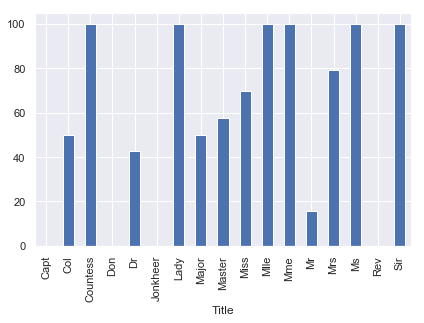

In [111]:
grouped_survival_bar('Title')

#### Since we do not have enough data to explain the survival rate for titles other than "Mr.", "Mrs.", "Master" and "Miss", let's combine the others in one category.

In [112]:
titanic.loc[~titanic['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), 'Title'] = 'Others'
titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

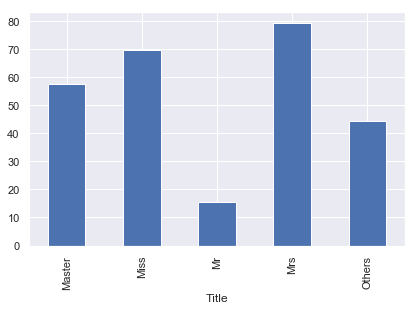

In [113]:
grouped_survival_bar('Title')

#### Let's one hot encode the above

In [114]:
ohetitle = OneHotEncoder()
encoded_title = ohetitle.fit_transform(titanic[['Title']]).toarray()
print(encoded_title)
print(ohetitle.get_feature_names())

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
['x0_Master' 'x0_Miss' 'x0_Mr' 'x0_Mrs' 'x0_Others']


In [117]:
encoded_df = pd.DataFrame(data=encoded_title, columns = ['Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'])
encoded_df.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [118]:
titanic = titanic.join(encoded_df)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,...,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,...,0.0,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,...,0.0,0.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,...,0.0,0.0,0.0,1.0,Miss,0.0,1.0,0.0,0.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,...,0.0,0.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,...,0.0,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0


In [119]:
titanic.drop('Title', axis=1, inplace=True)
titanic.drop('Name', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [120]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'],
      dtype='object')

In [121]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            714 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked_C     891 non-null    float64
 8   Embarked_Q     891 non-null    float64
 9   Embarked_S     891 non-null    float64
 10  Cabin_A        891 non-null    float64
 11  Cabin_B        891 non-null    float64
 12  Cabin_C        891 non-null    float64
 13  Cabin_D        891 non-null    float64
 14  Cabin_E        891 non-null    float64
 15  Cabin_F        891 non-null    float64
 16  Cabin_G        891 non-null    float64
 17  Cabin_Missing  891 non-null    float64
 18  Title_Mast

#### Imputing missing age with median for now

In [122]:
titanic['Age'].median()

28.0

In [123]:
titanic.loc[titanic['Age'].isnull(), 'Age'] = 28.0

In [124]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked_C     891 non-null    float64
 8   Embarked_Q     891 non-null    float64
 9   Embarked_S     891 non-null    float64
 10  Cabin_A        891 non-null    float64
 11  Cabin_B        891 non-null    float64
 12  Cabin_C        891 non-null    float64
 13  Cabin_D        891 non-null    float64
 14  Cabin_E        891 non-null    float64
 15  Cabin_F        891 non-null    float64
 16  Cabin_G        891 non-null    float64
 17  Cabin_Missing  891 non-null    float64
 18  Title_Mast

In [125]:
titanic.Age.median()

28.0

In [126]:
titanic.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [127]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'],
      dtype='object')

In [137]:
feature_columns = [x for x in titanic.columns if x != 'Survived']
print(feature_columns)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others']


In [138]:
X = titanic[feature_columns]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [139]:
X.isnull().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_Missing    0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Others     0
dtype: int64

In [140]:
y = titanic['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [141]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[1.        , 1.        , 0.27117366, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.34656949, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.32143755, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 1.        , 0.        ,
        0.        ]])

In [142]:
X = pd.DataFrame(data=X_scaled, columns=feature_columns)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


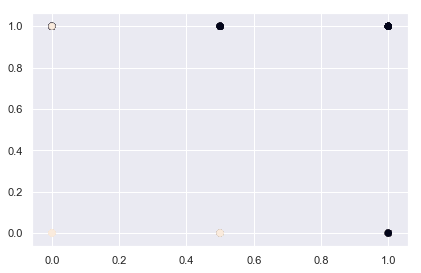

In [143]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

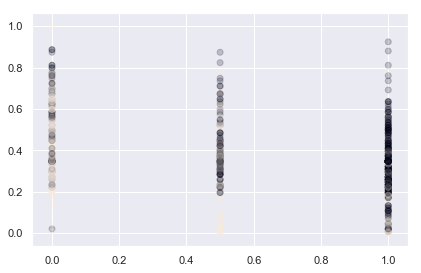

In [144]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=y, alpha=0.2)

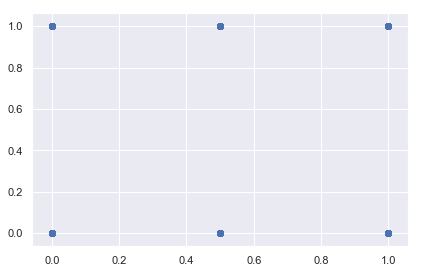

In [145]:
plt.scatter(X_scaled[:, 0], y)

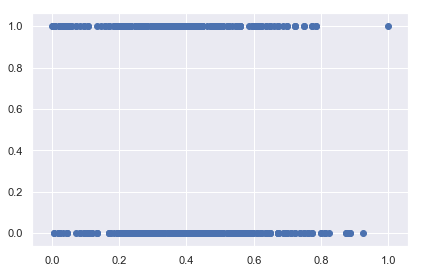

In [146]:
plt.scatter(X_scaled[:, 2], y)

In [147]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [148]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=20)
print(scores)
print(scores.mean())

[0.69565217 0.91304348 0.77777778 0.88888889 0.77777778 0.77777778
 0.82222222 0.93333333 0.88888889 0.81818182 0.79545455 0.81818182
 0.77272727 0.86363636 0.79545455 0.84090909 0.84090909 0.84090909
 0.84090909 0.86363636]
0.8283135704874838


/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [149]:
lr.fit(X, y)

/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
from sklearn.svm import SVC
svm = SVC(C=10, gamma='scale')
scores = cross_val_score(svm, X, y, cv=20)
print(scores)
print(scores.mean())

[0.73913043 0.86956522 0.75555556 0.82222222 0.75555556 0.77777778
 0.82222222 0.88888889 0.93333333 0.79545455 0.79545455 0.84090909
 0.77272727 0.86363636 0.77272727 0.81818182 0.88636364 0.88636364
 0.86363636 0.88636364]
0.8273034694773825


In [153]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, y, cv=20)
print(scores)
print(scores.mean())

/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajain11/anaconda3/lib/python3

[0.7826087  0.82608696 0.82222222 0.75555556 0.73333333 0.73333333
 0.8        0.86666667 0.88888889 0.81818182 0.84090909 0.77272727
 0.75       0.88636364 0.72727273 0.79545455 0.81818182 0.84090909
 0.79545455 0.95454545]
0.8104347826086957


/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [154]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(712, 22) (179, 22) (712,) (179,)


In [155]:
lr.fit(train_X, train_y)

/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
lr.score(test_X, test_y)

0.8156424581005587

In [157]:
lr.score(train_X, train_y)

0.8441011235955056

In [183]:
svm.fit(train_X, train_y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
svm.score(train_X, train_y)

0.8581460674157303

In [185]:
svm.score(test_X, test_y)

0.8212290502793296

In [161]:
rfc.fit(train_X, train_y)

/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
rfc.score(train_X, train_y)

0.9691011235955056

In [163]:
rfc.score(test_X, test_y)

0.8100558659217877

In [164]:
rfc2 = RandomForestClassifier(n_estimators=200)
rfc2.fit(train_X, train_y)
print(rfc2.score(train_X, train_y))
print(rfc2.score(test_X, test_y))

0.9845505617977528
0.8156424581005587


In [166]:
titanic_test = pd.read_csv('test.csv')

In [167]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [170]:
titanic_test.shape

(418, 11)

In [186]:
titanic_test.drop('PassengerId', axis=1, inplace=True)
titanic_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [187]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'],
      dtype='object')

In [190]:
titanic_test.drop('Ticket', axis=1, inplace=True)
titanic_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [191]:
titanic_test['Sex'] = le.transform(titanic_test['Sex'])
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,S


In [193]:
encoded_port = ohe.transform(titanic_test[['Embarked']]).toarray()
titanic_test.loc[:, 'Embarked_C'] = encoded_port[:, 0]
titanic_test.loc[:, 'Embarked_Q'] = encoded_port[:, 1]
titanic_test.loc[:, 'Embarked_S'] = encoded_port[:, 2]
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,Q,0.0,1.0,0.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,S,0.0,0.0,1.0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,Q,0.0,1.0,0.0
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,S,0.0,0.0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,S,0.0,0.0,1.0


In [194]:
titanic_test.drop('Embarked', axis=1, inplace=True)

In [195]:
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,0.0,1.0,0.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,0.0,0.0,1.0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,0.0,1.0,0.0
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,0.0,0.0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,0.0,0.0,1.0


In [197]:
titanic_test.loc[:, 'Cabin_Category'] = titanic_test.Cabin.str.extract(r'(?P<letter>[A-Z]).').letter
titanic_test[titanic_test.Cabin_Category.notnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Cabin_Category
12,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,82.2667,B45,0.0,0.0,1.0,B
14,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,61.1750,E31,0.0,0.0,1.0,E
24,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,262.3750,B57 B59 B63 B66,1.0,0.0,0.0,B
26,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,61.9792,B36,1.0,0.0,0.0,B
28,1,"Brady, Mr. John Bertram",1,41.0,0,0,30.5000,A21,0.0,0.0,1.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,27.7208,D40,1.0,0.0,0.0,D
405,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,13.8625,D38,1.0,0.0,0.0,D
407,1,"Widener, Mr. George Dunton",1,50.0,1,1,211.5000,C80,1.0,0.0,0.0,C
411,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,90.0000,C78,0.0,1.0,0.0,C


In [198]:
titanic_test.loc[titanic_test.Cabin.isnull(), 'Cabin_Category'] = 'Z'

In [200]:
titanic_test.loc[titanic_test['Cabin_Category'].isnull(), 'Cabin_Category'] = 'Z'
titanic_test.Cabin_Category.isnull().sum()

0

In [201]:
titanic_test['Cabin_Category'].value_counts()

Z    329
C     35
B     18
D     12
E      9
A      7
F      7
G      1
Name: Cabin_Category, dtype: int64

In [202]:
encoded_cc = ohe_cc.transform(titanic_test[['Cabin_Category']]).toarray()
print(encoded_cc)
print(ohe_cc.get_feature_names())

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['x0_A' 'x0_B' 'x0_C' 'x0_D' 'x0_E' 'x0_F' 'x0_G' 'x0_Z']


In [203]:
encoded_df = pd.DataFrame(data=encoded_cc, columns = ['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing'])
encoded_df.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [204]:
titanic_test = titanic_test.join(encoded_df)

In [205]:
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Cabin_Category,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,0.0,1.0,0.0,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,0.0,0.0,1.0,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,0.0,1.0,0.0,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,0.0,0.0,1.0,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,0.0,0.0,1.0,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [206]:
titanic_test.drop('Cabin_Category', axis=1, inplace=True)
titanic_test.drop('Cabin', axis=1, inplace=True)
titanic_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing'],
      dtype='object')

In [207]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'],
      dtype='object')

In [208]:
titles = titanic_test['Name'].str.extract(r'(?P<letter>\w+)\.')
titles.head()

,letter
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs


In [210]:
titles.letter.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: letter, dtype: int64

In [211]:
titanic_test.loc[:, 'Title'] = titles.letter
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mrs
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mr
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mrs


In [212]:
titanic_test.loc[~titanic_test['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), 'Title'] = 'Others'
titanic_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Others      7
Name: Title, dtype: int64

In [213]:
encoded_title = ohetitle.transform(titanic_test[['Title']]).toarray()
print(encoded_title)
print(ohetitle.get_feature_names())

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
['x0_Master' 'x0_Miss' 'x0_Mr' 'x0_Mrs' 'x0_Others']


In [214]:
encoded_df = pd.DataFrame(data=encoded_title, columns = ['Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'])
encoded_df.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [217]:
titanic_test = titanic_test.join(encoded_df)
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,Mrs,0.0,0.0,0.0,1.0,0.0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,Mrs,0.0,0.0,0.0,1.0,0.0


In [218]:
titanic_test.drop('Title', axis=1, inplace=True)
titanic_test.drop('Name', axis=1, inplace=True)
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [219]:
titanic_test.loc[titanic_test['Age'].isnull(), 'Age'] = 28.0

In [220]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           417 non-null    float64
 6   Embarked_C     418 non-null    float64
 7   Embarked_Q     418 non-null    float64
 8   Embarked_S     418 non-null    float64
 9   Cabin_A        418 non-null    float64
 10  Cabin_B        418 non-null    float64
 11  Cabin_C        418 non-null    float64
 12  Cabin_D        418 non-null    float64
 13  Cabin_E        418 non-null    float64
 14  Cabin_F        418 non-null    float64
 15  Cabin_G        418 non-null    float64
 16  Cabin_Missing  418 non-null    float64
 17  Title_Master   418 non-null    float64
 18  Title_Miss

In [221]:
titanic_test[titanic_test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
152,3,1,60.5,0,0,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [225]:
titanic[titanic['Pclass'] == 3]['Fare'].describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

In [226]:
titanic_test.loc[titanic_test['Fare'].isnull(), 'Fare'] = 8.05

In [227]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           418 non-null    float64
 6   Embarked_C     418 non-null    float64
 7   Embarked_Q     418 non-null    float64
 8   Embarked_S     418 non-null    float64
 9   Cabin_A        418 non-null    float64
 10  Cabin_B        418 non-null    float64
 11  Cabin_C        418 non-null    float64
 12  Cabin_D        418 non-null    float64
 13  Cabin_E        418 non-null    float64
 14  Cabin_F        418 non-null    float64
 15  Cabin_G        418 non-null    float64
 16  Cabin_Missing  418 non-null    float64
 17  Title_Master   418 non-null    float64
 18  Title_Miss

In [229]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'],
      dtype='object')

In [230]:
titanic_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'],
      dtype='object')

In [231]:
X_eval = titanic_test[feature_columns]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [232]:
X_eval_scaled = min_max_scaler.transform(X_eval)
X_eval_scaled

array([[1.        , 1.        , 0.4282483 , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.58532295, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 1.        , 0.77381252, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.47851219, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.34656949, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.34656949, ..., 0.        , 0.        ,
        0.        ]])

In [233]:
X_eval = pd.DataFrame(data=X_eval_scaled, columns=feature_columns)
X_eval.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,1.0,1.0,0.428248,0.000,0.000000,0.015282,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.585323,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.5,1.0,0.773813,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.334004,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.271174,0.125,0.166667,0.023984,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [234]:
X_eval.isnull().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_Missing    0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Others     0
dtype: int64

In [235]:
lr.fit(X, y)

/Users/ajain11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
test_preds = lr.predict(X_eval)

In [237]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [238]:
test_preds.size

418

In [239]:
titanic_test.shape

(418, 22)

In [240]:
titanic_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'],
      dtype='object')

In [241]:
titanic_test['Survived'] = test_preds

In [242]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Survived
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [244]:
test_data = pd.read_csv('test.csv')

In [246]:
test_data.loc[:, 'Survived'] = titanic_test['Survived']

In [247]:
output = test_data[['PassengerId', 'Survived']]
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [248]:
output.to_csv('submission.csv', index = False)

In [249]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [250]:
output.Survived.value_counts()

0    248
1    170
Name: Survived, dtype: int64